## 案例2:使用PCA进行图像的降维，k=36
## 数据集：data/ex7faces.mat

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/ex7faces.mat')
X = mat['X']
print(X.shape)

(5000, 1024)


In [3]:
def plot_100_images(X):
    fig, axs = plt.subplots(ncols=10, nrows=10, figsize=(10,10))
    for c in range(10):
        for r in range(10):
            axs[c,r].imshow(X[10*c + r].reshape(32,32).T,cmap = 'Greys_r') #显示单通道的灰度图
            axs[c,r].set_xticks([])
            axs[c,r].set_yticks([])

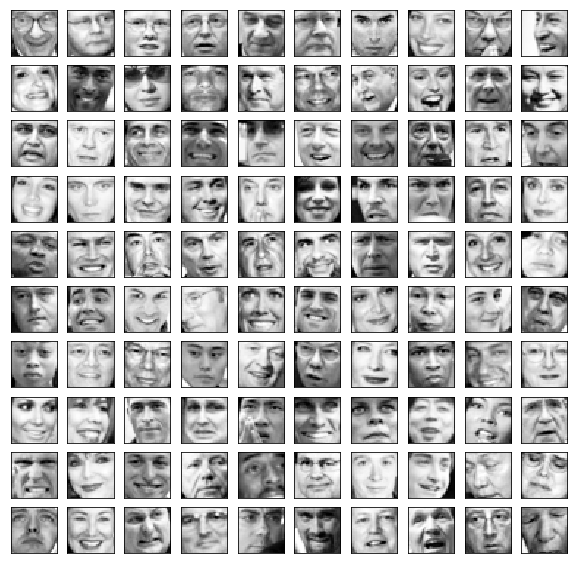

In [4]:
plot_100_images(X)

In [5]:
means = np.mean(X,axis=0)
X_demean = X - means
C = X_demean.T@X_demean
U,S,V = np.linalg.svd(C)

In [6]:
U1 = U[:,:36]
X_reduction = X_demean@U1
X_reduction.shape

(5000, 36)

In [7]:
X_recover = X_reduction@U1.T+means

(None, None)

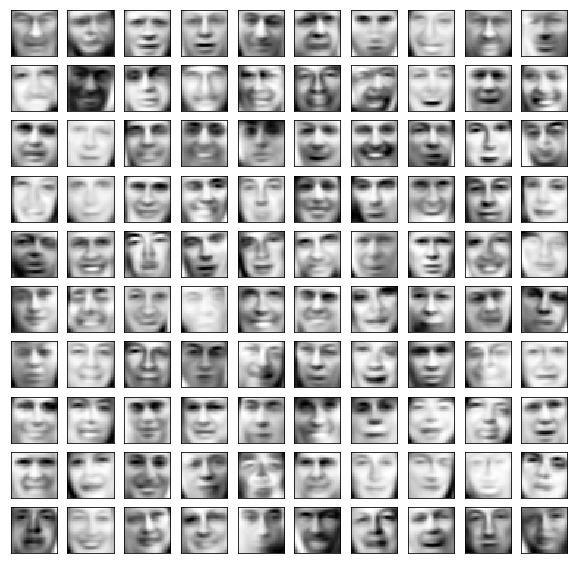

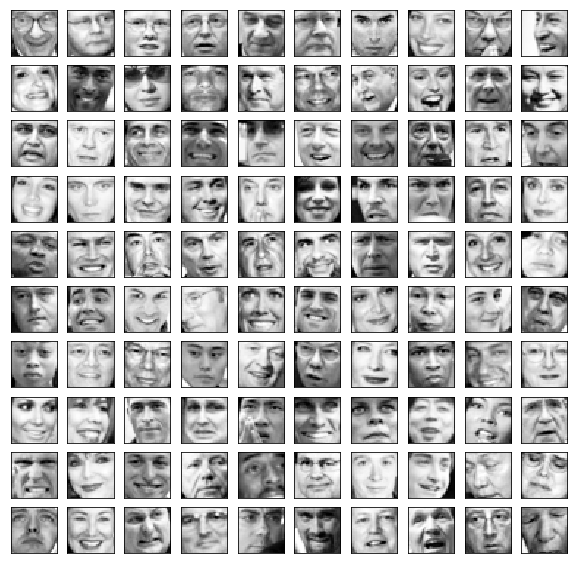

In [8]:
plot_100_images(X_recover),plot_100_images(X)